# Exp 10
Build and train a GAN for generating hand-written digits

In [ ]:
#  Imports
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time

# Load MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]
BUFFER_SIZE = 60000
BATCH_SIZE = 128
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#  Generator Model
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, 5, strides=1, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, 5, strides=2, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, 5, strides=2, padding='same', use_bias=False, activation='tanh')
    ])
    return model

#  Discriminator Model
def make_discriminator_m9odel():
    model = tf.keras.Sequential([
        layers.Conv2D(64, 5, strides=2, padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, 5, strides=2, padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

# Loss and Optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output)  # label smoothing
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# 🔁 Training Loop
EPOCHS = 50
noise_dim = 100
num_examples = 16
seed = tf.random.normal([num_examples, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_disc, discriminator.trainable_variables))

    return gen_loss, disc_loss

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    predictions = (predictions + 1) / 2.0

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Epoch {epoch}")
    plt.show()

def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        print(f"Epoch {epoch+1}, Generator Loss: {gen_loss:.4f}, Discriminator Loss: {disc_loss:.4f}")
        if (epoch + 1) % 5 == 0:
            generate_and_save_images(generator, epoch + 1, seed)


        print(f"Time for epoch {epoch+1} is {time.time()-start:.2f} sec\n")

Epoch 1, Generator Loss: 0.7640, Discriminator Loss: 1.5252
Time for epoch 1 is 16.48 sec

Epoch 2, Generator Loss: 0.8838, Discriminator Loss: 1.3729
Time for epoch 2 is 12.73 sec

Epoch 3, Generator Loss: 1.2361, Discriminator Loss: 1.2383
Time for epoch 3 is 12.52 sec

Epoch 4, Generator Loss: 1.2234, Discriminator Loss: 0.9955
Time for epoch 4 is 12.32 sec

Epoch 5, Generator Loss: 1.2535, Discriminator Loss: 1.0049


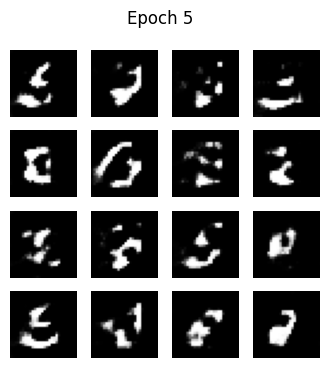

Time for epoch 5 is 12.44 sec

Epoch 6, Generator Loss: 1.2719, Discriminator Loss: 0.9116
Time for epoch 6 is 12.23 sec

Epoch 7, Generator Loss: 1.3002, Discriminator Loss: 0.9780
Time for epoch 7 is 12.30 sec

Epoch 8, Generator Loss: 1.2772, Discriminator Loss: 1.1568
Time for epoch 8 is 12.41 sec

Epoch 9, Generator Loss: 1.4579, Discriminator Loss: 1.0112
Time for epoch 9 is 12.45 sec

Epoch 10, Generator Loss: 1.4378, Discriminator Loss: 1.0661


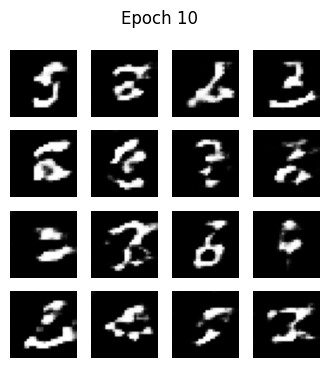

Time for epoch 10 is 13.09 sec

Epoch 11, Generator Loss: 1.3606, Discriminator Loss: 1.0647
Time for epoch 11 is 12.38 sec

Epoch 12, Generator Loss: 1.0909, Discriminator Loss: 1.1669
Time for epoch 12 is 12.36 sec

Epoch 13, Generator Loss: 1.3546, Discriminator Loss: 1.1221
Time for epoch 13 is 12.37 sec

Epoch 14, Generator Loss: 1.3254, Discriminator Loss: 1.0458
Time for epoch 14 is 12.33 sec

Epoch 15, Generator Loss: 1.0537, Discriminator Loss: 1.1247


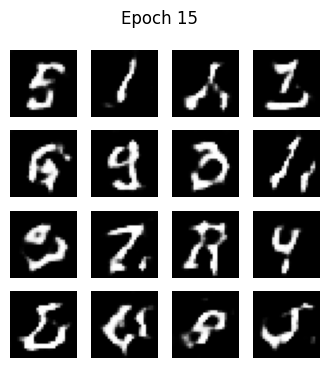

Time for epoch 15 is 12.56 sec

Epoch 16, Generator Loss: 1.1486, Discriminator Loss: 1.2003
Time for epoch 16 is 12.38 sec

Epoch 17, Generator Loss: 1.0984, Discriminator Loss: 1.1802
Time for epoch 17 is 12.37 sec

Epoch 18, Generator Loss: 1.1342, Discriminator Loss: 1.2608
Time for epoch 18 is 12.38 sec

Epoch 19, Generator Loss: 1.1744, Discriminator Loss: 1.1204
Time for epoch 19 is 12.36 sec

Epoch 20, Generator Loss: 1.3255, Discriminator Loss: 1.1142


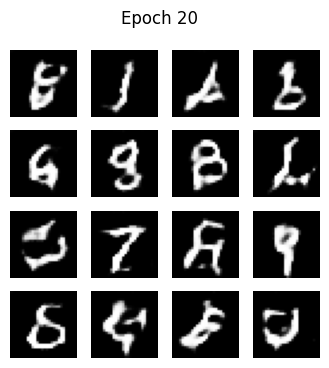

Time for epoch 20 is 12.54 sec

Epoch 21, Generator Loss: 0.9527, Discriminator Loss: 1.2888
Time for epoch 21 is 12.36 sec

Epoch 22, Generator Loss: 0.9072, Discriminator Loss: 1.3287
Time for epoch 22 is 12.34 sec

Epoch 23, Generator Loss: 1.0355, Discriminator Loss: 1.2461
Time for epoch 23 is 12.34 sec

Epoch 24, Generator Loss: 1.1925, Discriminator Loss: 1.1597
Time for epoch 24 is 12.32 sec

Epoch 25, Generator Loss: 0.9130, Discriminator Loss: 1.3936


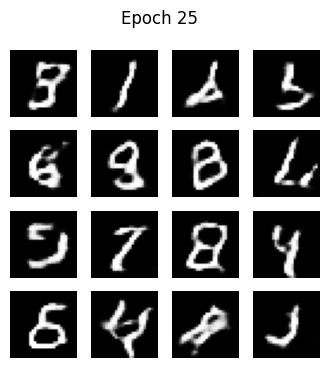

Time for epoch 25 is 12.53 sec

Epoch 26, Generator Loss: 0.9470, Discriminator Loss: 1.2906
Time for epoch 26 is 12.33 sec

Epoch 27, Generator Loss: 1.0860, Discriminator Loss: 1.3275
Time for epoch 27 is 12.34 sec

Epoch 28, Generator Loss: 1.0571, Discriminator Loss: 1.2614
Time for epoch 28 is 12.35 sec

Epoch 29, Generator Loss: 1.2505, Discriminator Loss: 1.1514
Time for epoch 29 is 12.34 sec

Epoch 30, Generator Loss: 1.2105, Discriminator Loss: 1.1522


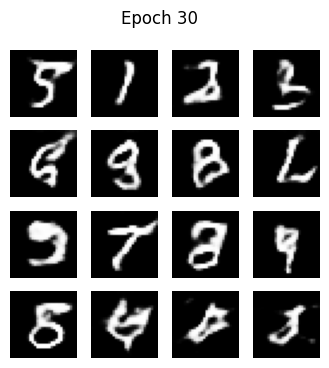

Time for epoch 30 is 12.56 sec

Epoch 31, Generator Loss: 1.0157, Discriminator Loss: 1.1682
Time for epoch 31 is 12.34 sec

Epoch 32, Generator Loss: 1.2117, Discriminator Loss: 1.1161
Time for epoch 32 is 12.35 sec

Epoch 33, Generator Loss: 1.1439, Discriminator Loss: 1.1145
Time for epoch 33 is 12.34 sec

Epoch 34, Generator Loss: 0.9600, Discriminator Loss: 1.2136
Time for epoch 34 is 12.37 sec

Epoch 35, Generator Loss: 0.8686, Discriminator Loss: 1.3915


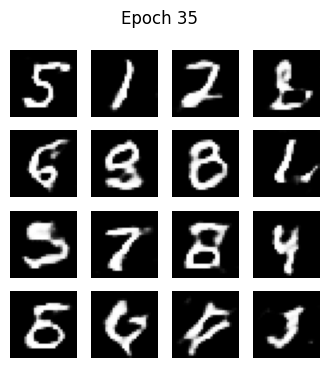

Time for epoch 35 is 12.56 sec

Epoch 36, Generator Loss: 1.0074, Discriminator Loss: 1.2708
Time for epoch 36 is 12.36 sec

Epoch 37, Generator Loss: 1.1693, Discriminator Loss: 1.3115
Time for epoch 37 is 12.35 sec

Epoch 38, Generator Loss: 0.9349, Discriminator Loss: 1.4001
Time for epoch 38 is 12.34 sec

Epoch 39, Generator Loss: 1.1759, Discriminator Loss: 1.1148
Time for epoch 39 is 12.36 sec

Epoch 40, Generator Loss: 1.2019, Discriminator Loss: 1.1074


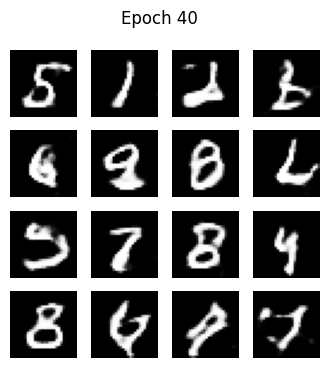

Time for epoch 40 is 12.66 sec

Epoch 41, Generator Loss: 1.1238, Discriminator Loss: 1.0979
Time for epoch 41 is 12.38 sec

Epoch 42, Generator Loss: 1.1394, Discriminator Loss: 1.0803
Time for epoch 42 is 12.39 sec

Epoch 43, Generator Loss: 1.1131, Discriminator Loss: 1.2525
Time for epoch 43 is 12.39 sec

Epoch 44, Generator Loss: 1.0125, Discriminator Loss: 1.3205
Time for epoch 44 is 12.36 sec

Epoch 45, Generator Loss: 0.9200, Discriminator Loss: 1.3087


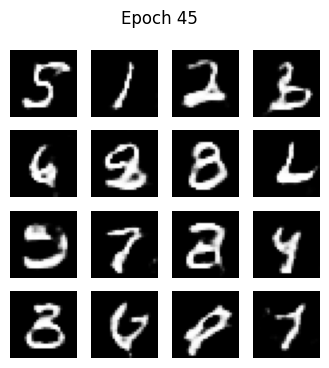

Time for epoch 45 is 12.57 sec

Epoch 46, Generator Loss: 1.0432, Discriminator Loss: 1.2648
Time for epoch 46 is 12.39 sec

Epoch 47, Generator Loss: 1.1678, Discriminator Loss: 1.2256
Time for epoch 47 is 12.37 sec

Epoch 48, Generator Loss: 0.9087, Discriminator Loss: 1.3275
Time for epoch 48 is 12.37 sec

Epoch 49, Generator Loss: 0.9268, Discriminator Loss: 1.3202
Time for epoch 49 is 12.37 sec



In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
import tensorflow as tf
print("GPU:", tf.config.list_physical_devices('GPU'))


GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1 completed


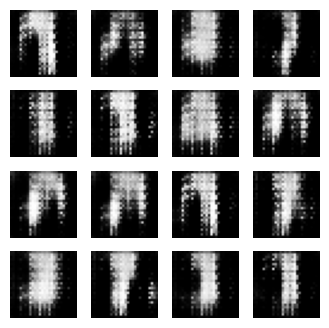

Epoch 2 completed


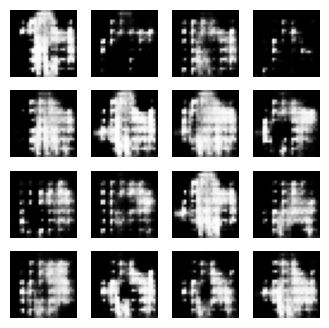

Epoch 3 completed


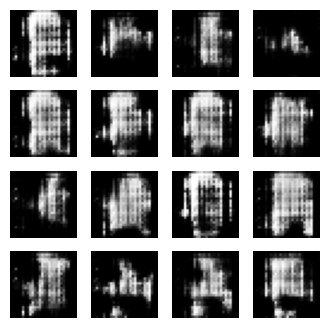

Epoch 4 completed


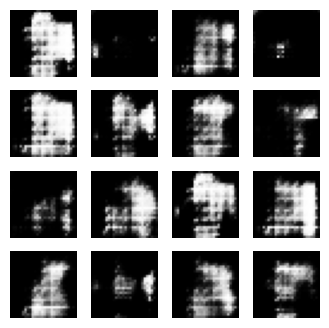

Epoch 5 completed


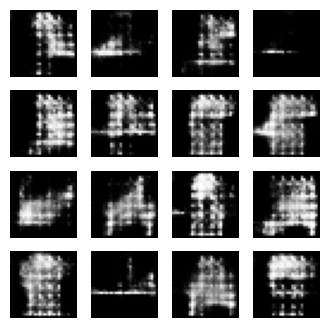

Epoch 6 completed


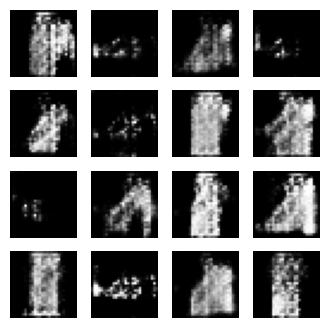

Epoch 7 completed


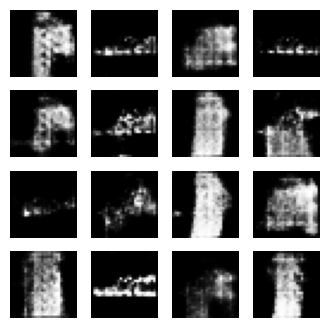

Epoch 8 completed


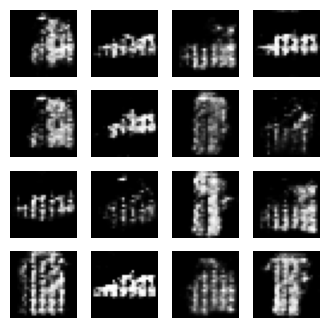

Epoch 9 completed


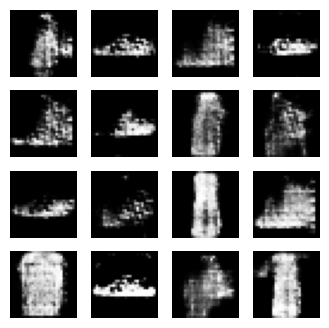

Epoch 10 completed


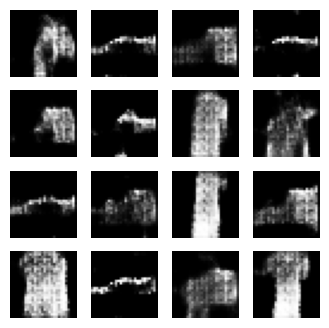

Epoch 11 completed


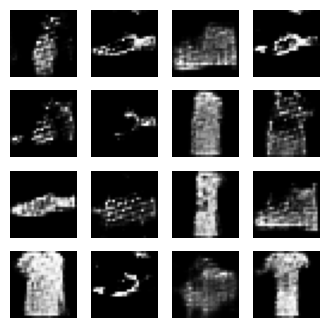

Epoch 12 completed


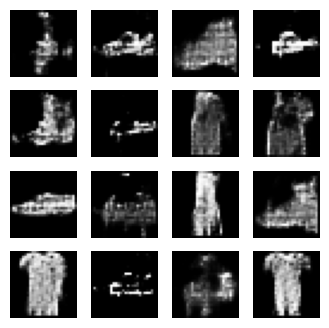

Epoch 13 completed


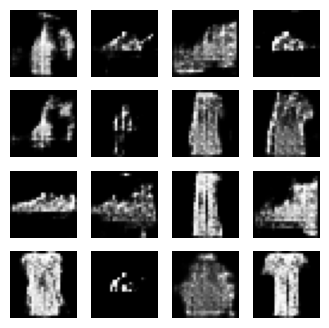

Epoch 14 completed


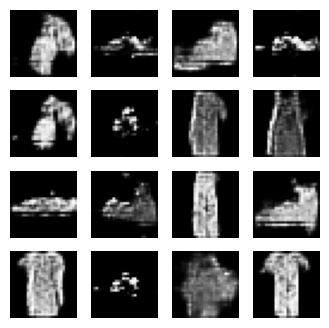

Epoch 15 completed


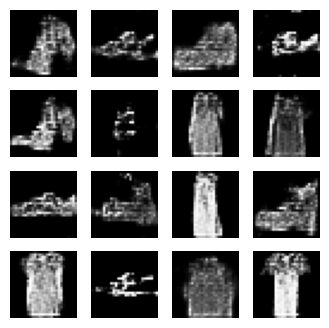

Epoch 16 completed


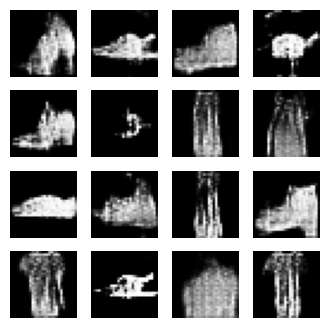

Epoch 17 completed


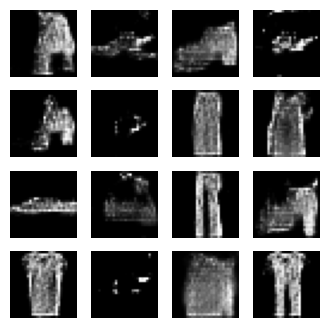

Epoch 18 completed


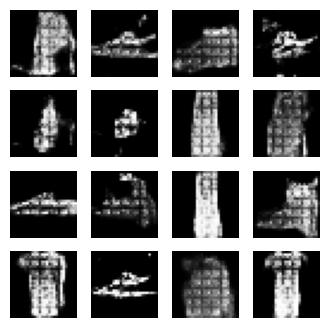

Epoch 19 completed


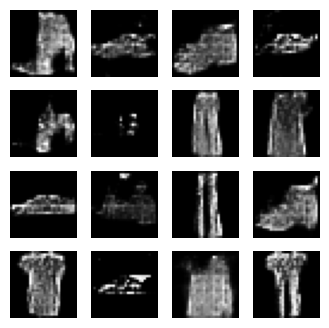

Epoch 20 completed


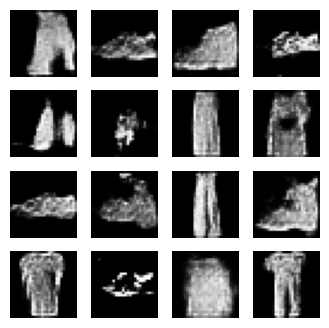

Epoch 21 completed


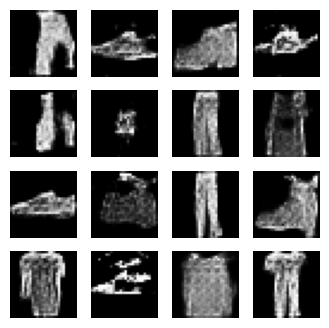

Epoch 22 completed


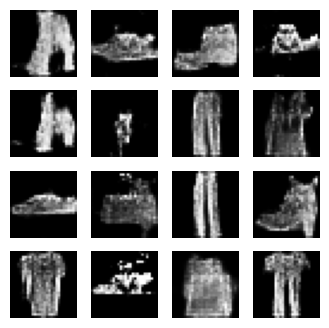

Epoch 23 completed


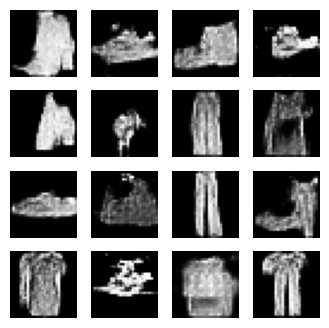

Epoch 24 completed


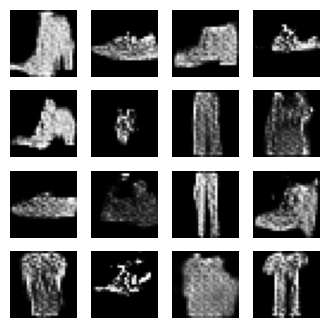

Epoch 25 completed


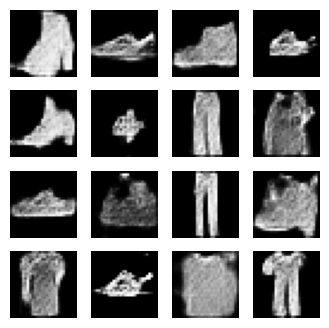

Epoch 26 completed


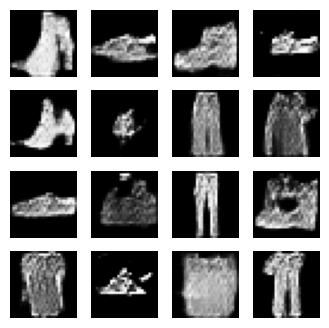

Epoch 27 completed


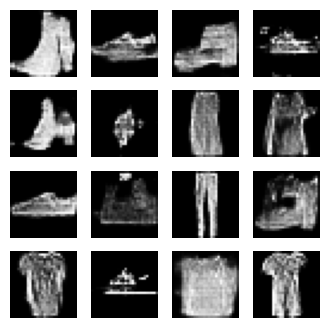

Epoch 28 completed


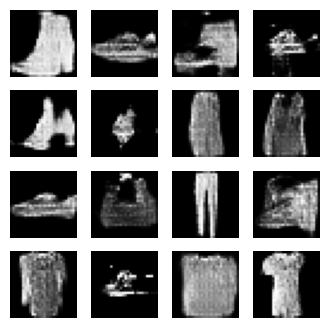

Epoch 29 completed


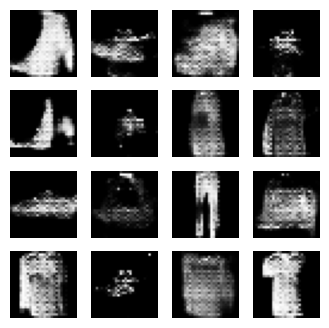

Epoch 30 completed


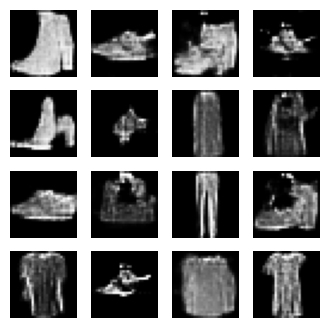

Epoch 31 completed


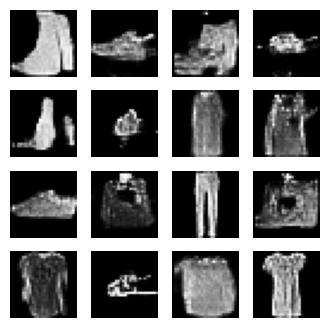

Epoch 32 completed


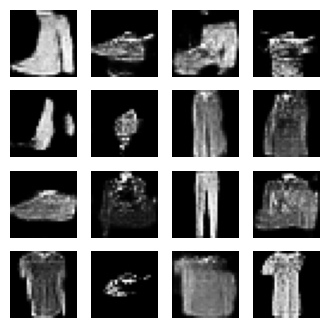

Epoch 33 completed


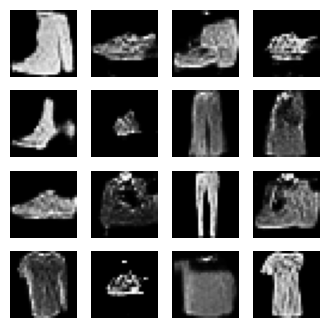

Epoch 34 completed


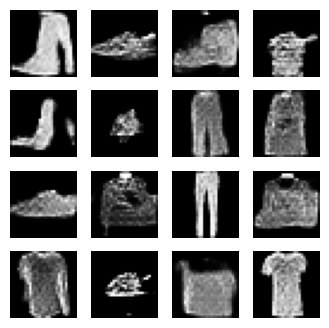

Epoch 35 completed


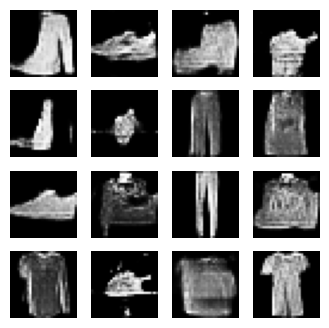

Epoch 36 completed


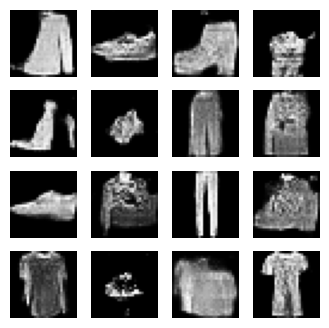

Epoch 37 completed


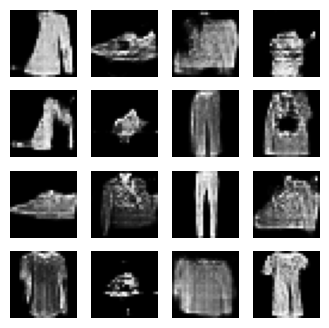

Epoch 38 completed


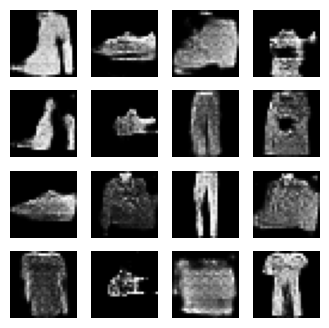

Epoch 39 completed


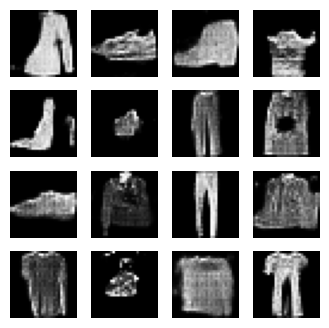

Epoch 40 completed


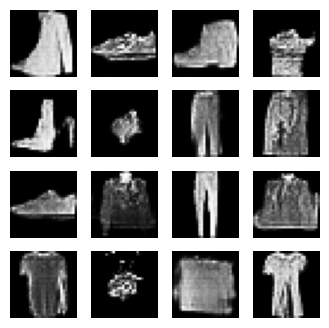

Epoch 41 completed


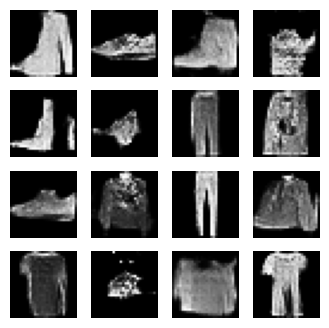

Epoch 42 completed


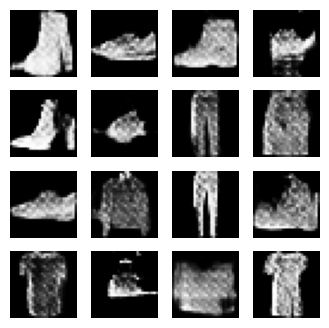

Epoch 43 completed


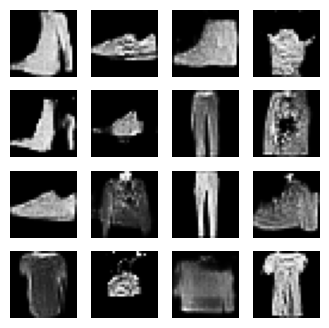

Epoch 44 completed


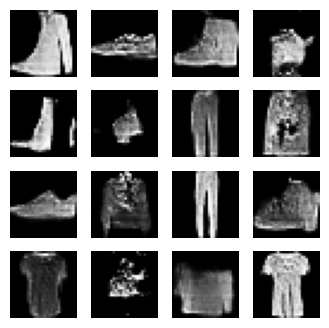

Epoch 45 completed


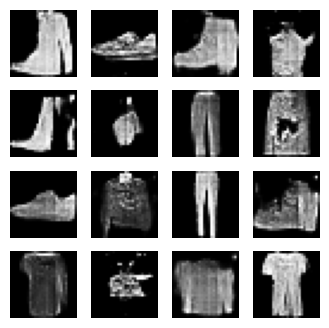

Epoch 46 completed


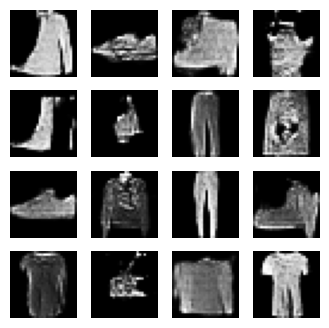

Epoch 47 completed


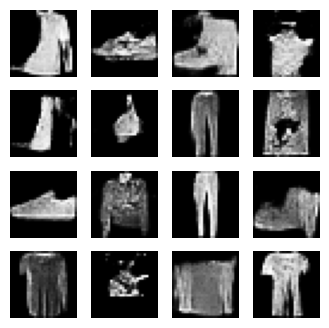

Epoch 48 completed


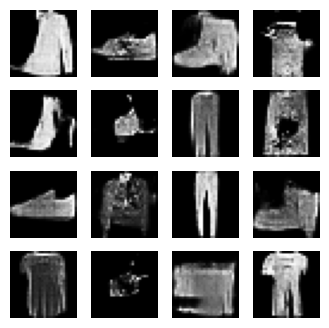

Epoch 49 completed


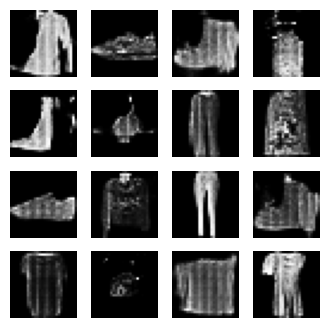

Epoch 50 completed


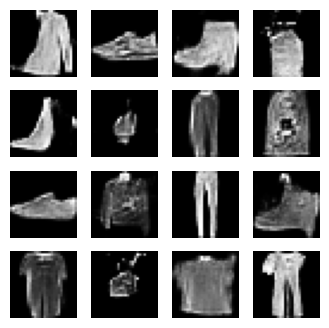

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype("float32")
train_images = (train_images - 127.5) / 127.5 # Normalize to [-1, 1]
BUFFER_SIZE = 60000
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

# Discriminator
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                      input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

# Losses
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Instantiate models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training Loop
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Image generation
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:03d}.png')
    plt.show()

# Training function
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        print(f'Epoch {epoch + 1} completed')
        generate_and_save_images(generator, epoch + 1, seed)

# Start training
train(train_dataset, EPOCHS)